In [2]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import pytz
from datetime import datetime, timedelta
from time import sleep
import netCDF4 as nc
import h5netcdf
import glob
# import cf_xarray as cfxr
import shapely
# import xesmf as xe
import geopandas as gpd
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs   
from matplotlib.pyplot import figure

# ERA5

In [3]:
df = xr.open_dataset('/home/mendozaemir/research/remote-sensing-landuse/data/ERA5_reanalysis_nairobi_d01')
df

lat=df.latitude
lon=df.longitude
precip=df.tp
print(precip)

precip_sum = precip.sum(dim='time')
print(precip_sum)


<xarray.DataArray 'tp' (time: 120, latitude: 53, longitude: 54)>
[343440 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 30.12 30.37 30.62 30.87 ... 42.87 43.12 43.37
  * latitude   (latitude) float32 5.13 4.88 4.63 4.38 ... -7.37 -7.62 -7.87
  * time       (time) datetime64[ns] 2021-04-01 ... 2021-04-30T18:00:00
Attributes:
    units:      m
    long_name:  Total precipitation
<xarray.DataArray 'tp' (latitude: 53, longitude: 54)>
array([[0.01610835, 0.01540075, 0.01627627, ..., 0.01588512, 0.01496167,
        0.01316594],
       [0.01809995, 0.01530046, 0.01619187, ..., 0.01319887, 0.01244747,
        0.01432143],
       [0.0190578 , 0.01603158, 0.0165089 , ..., 0.01167636, 0.00965623,
        0.01159489],
       ...,
       [0.02443176, 0.03886879, 0.06248593, ..., 0.05080218, 0.04808153,
        0.04623082],
       [0.03308426, 0.02906429, 0.05266821, ..., 0.05355902, 0.05092245,
        0.04925262],
       [0.03447148, 0.0303492 , 0.03709099, ..., 0.05552

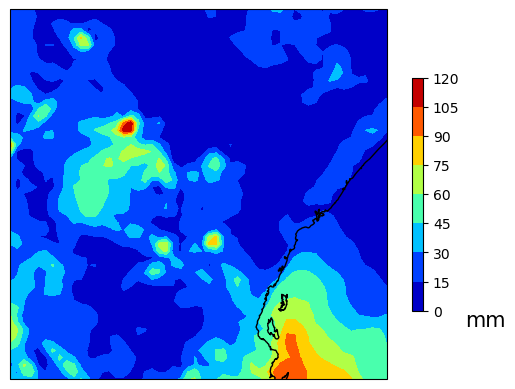

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())

cf = plt.contourf(lon, lat, precip_sum*1000, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.05)
cb.set_label('mm', fontsize=15, rotation=0, loc='bottom')

ax.add_feature(cfeature.COASTLINE)

plt.show()

# CMORPH

In [7]:
# import urllib
# import shutil
# import re
# from pathlib import Path
# from bs4 import BeautifulSoup

# day_list = list(range(9, 10))
# print(day_list)
# for day in day_list:
   
#   # target page containing links to the image files
#   target_page = 'https://www.ncei.noaa.gov/data/cmorph-high-resolution-global-precipitation-estimates/access/30min/8km/2021/04/' + '0' + str(day) + '/'

#   # local path
#   dest_path = '/home/mendozaemir/research/remote-sensing-landuse/data/cmorph'

#   # NOTE: this implementation (easily modified) assumes link hrefs contain absolute
#   # URL's with 'http://' protocol prefix e.g. http://example.com/dir/image.jpg and that 
#   # all links on the target_page point to desired image files.

#   img_urls = []

#   page = urllib.request.urlopen(target_page).read()
#   soup = BeautifulSoup(page, 'html.parser')
#   # print(soup)
#   for link in soup.findAll('a', attrs={'href': re.compile('_(\d+)\.nc$')}):
#       print(link)
#       img_urls.append(link.get('href'))

#   counter = 1

#   for img_url in img_urls:

#     img_filename = Path(img_url).name
#     img_dest = dest_path + '/' + img_filename

#     # recreate url with a url-encoded img_filename to handle whitespace in filenames
#     img_url_clean = img_url.rsplit('/', 1)[0] + '/' + urllib.parse.quote(img_filename)
#     img_url_clean = target_page+ img_url_clean.split('/')[0]

#     print(str(counter) + ":\t " + img_dest)
#     counter += 1

#     urllib.request.urlretrieve(img_url_clean, img_dest)

#     #if counter > 4:
#     #  break

#   print("DONE!")
#   print("Saved " + str(counter - 1) + " files.")

[9]
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040900.nc">CMORPH_V1.0_ADJ_8km-30min_2021040900.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040901.nc">CMORPH_V1.0_ADJ_8km-30min_2021040901.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040902.nc">CMORPH_V1.0_ADJ_8km-30min_2021040902.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040903.nc">CMORPH_V1.0_ADJ_8km-30min_2021040903.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040904.nc">CMORPH_V1.0_ADJ_8km-30min_2021040904.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040905.nc">CMORPH_V1.0_ADJ_8km-30min_2021040905.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040906.nc">CMORPH_V1.0_ADJ_8km-30min_2021040906.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040907.nc">CMORPH_V1.0_ADJ_8km-30min_2021040907.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040908.nc">CMORPH_V1.0_ADJ_8km-30min_2021040908.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040909.nc">CMORPH_V1.0_ADJ_8km-30min_2021040909.nc</a>
<a href="CMORPH_V1.0_ADJ_8km-30min_2021040910.nc">CMORPH

In [8]:
cmorph_list = []
for filepath in glob.iglob("/home/mendozaemir/research/remote-sensing-landuse/data/cmorph/*.nc"):
    ncfile = xr.open_dataset(filepath, chunks = {'time': 10})
    cmorph_list.append(ncfile)


In [24]:
lat = cmorph_list[5].lat
lon = cmorph_list[5].lon
time = cmorph_list[23].time
print(lat)
print(lon)
cmorph = 0
for ds in cmorph_list:
    cmorph_hr = ds.cmorph.sum(axis=0)
    cmorph += cmorph_hr.values



<xarray.DataArray 'lat' (lat: 1649)>
array([-59.963614, -59.890843, -59.818072, ...,  59.818071,  59.890842,
        59.963613])
Coordinates:
  * lat      (lat) float64 -59.96 -59.89 -59.82 -59.75 ... 59.82 59.89 59.96
Attributes:
    standard_name:  latitude
    long_name:      latitude of center of grid box
    units:          degrees_north
    axis:           Y
    valid_min:      -59.963614312
    valid_max:      59.963613336
    bounds:         lat_bounds
<xarray.DataArray 'lon' (lon: 4948)>
array([3.637833e-02, 1.091350e-01, 1.818917e-01, ..., 3.598181e+02,
       3.598909e+02, 3.599636e+02])
Coordinates:
  * lon      (lon) float64 0.03638 0.1091 0.1819 0.2546 ... 359.8 359.9 360.0
Attributes:
    standard_name:  longitude
    long_name:      longitude of center of grid box
    units:          degrees_east
    axis:           X
    valid_min:      0.0363783345
    valid_max:      359.9636198775
    bounds:         lon_bounds


# NAIROBI, KENYA

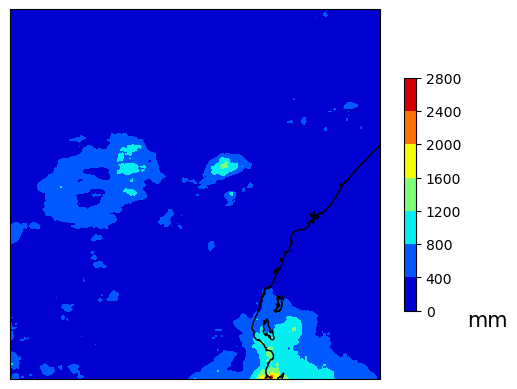

In [10]:
# Domain 1
# 36.749, -1.282
# 30.136 ~ 43.362, -7.869 ~ 5.323

# 6.613, -6.587~+6.605

# Domain 3
# 36.749, -1.282
# 35.987 ~ 37.323, -2.044 ~ -0.708
# -0.762 ~ +0.574, -0.762 ~ +0.574


ax = plt.axes(projection=ccrs.PlateCarree())

lonbounds = (lon > 30.136) & (lon < 43.362)
latbounds = (lat > -7.869) & (lat < 5.323)
lonrange = lon[lonbounds]
latrange = lat[latbounds]
lonindices = np.where(lonbounds)[0]
latindices = np.where(latbounds)[0]

# code to control scale of contourf -> levels=np.linspace(0,20)
cf = plt.contourf(lonrange, latrange, cmorph[latindices, lonindices[:, np.newaxis]].T, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.05)
cb.set_label('mm', fontsize=15, rotation=0, loc='bottom')

ax.add_feature(cfeature.COASTLINE)

plt.show()

# Lagos, Nigeria

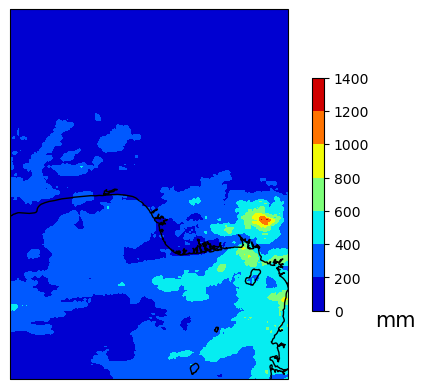

In [11]:
# Lagos Nigeria: 3.351209, 6.421560

ax = plt.axes(projection=ccrs.PlateCarree())


lonbounds = (lon > -3.262) & (lon < 9.964)
latbounds = (lat > -0.165) & (lat < 13.027)
lonrange = lon[lonbounds]
latrange = lat[latbounds]
lonindices = np.where(lonbounds)[0]
latindices = np.where(latbounds)[0]
cf = plt.contourf(lonrange, latrange, cmorph[latindices,lonindices[:, np.newaxis]].T, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.05)
cb.set_label('mm', fontsize=15, rotation=0, loc='bottom')

ax.add_feature(cfeature.COASTLINE)

plt.show()

# Accra, Ghana

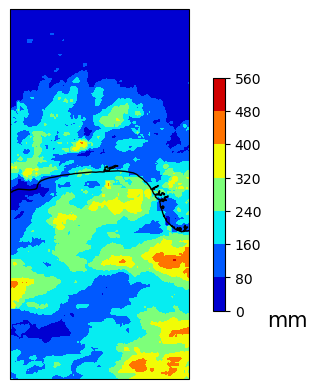

In [33]:
# Accra Ghana: -0.1870, 5.6037
# 6.613, -6.587~+6.605
# -6.8 ~ +6.426, -0.9833 ~ 12.2087

ax = plt.axes(projection=ccrs.PlateCarree())

# longitude is from ranges 0 to 359. might need to change how to capture areas nearing the edge values
lonbounds = (lon > -6.8) & (lon < 6.426)
latbounds = (lat > -0.9833) & (lat < 12.2087)
lonrange = lon[lonbounds]
latrange = lat[latbounds]
lonindices = np.where(lonbounds)[0]
latindices = np.where(latbounds)[0]

# code to control scale of contourf -> levels=np.linspace(0,20)
cf = plt.contourf(lonrange, latrange, cmorph[latindices,lonindices[:, np.newaxis]].T, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.05)
cb.set_label('mm', fontsize=15, rotation=0, loc='bottom')

ax.add_feature(cfeature.COASTLINE)

plt.show()

# WRF RESULTS

In [21]:
wrf_file = '/home/mendozaemir/research/remote-sensing-landuse/data/wrfout_d01_2021-04-01_00:00:00'
df_wrf = xr.open_dataset(wrf_file)
lat_wrf=df_wrf.XLAT
lon_wrf=df_wrf.XLONG
precip=df_wrf.RAINNC + df_wrf.RAINC 
print(precip[714].shape)

(99, 99)


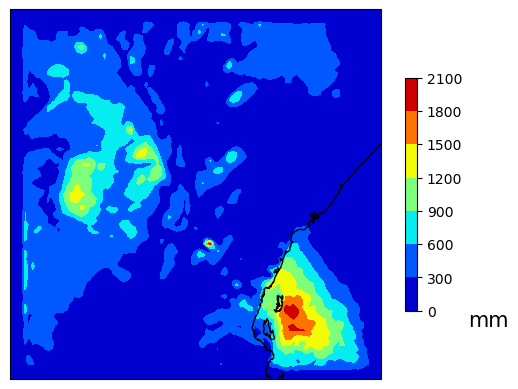

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())

cf = plt.contourf(lon_wrf[0], lat_wrf[0], precip[714], cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.05)
cb.set_label('mm', fontsize=15, rotation=0, loc='bottom')

ax.add_feature(cfeature.COASTLINE)

plt.show()

In [11]:
# try to download contourf plot as tif to visualize in qgis. currently dismissed because rainc value
# in nairobi d03 is 0, but i eventually need the rainc+rainnc values
for c in cf.collections:
    c.set_rasterized(True)

plt.savefig('do3_precip.tif', dpi=100)

<Figure size 640x480 with 0 Axes>

In [53]:
def generate_times(df):
    times = df.variables['XTIME']
    times = nc.num2date(times[:],times.units,only_use_cftime_datetimes=False)
    return times

def timeseries(ifil,axs,label):
    var1 = df.variables['RAINNC'][:,:,:]
    var2 = df.variables['RAINC'][:,:,:]
    var = var1+var2
    var = np.nanmean(var,axis=(1,2))
    var = np.roll(var,-1,axis=0)-var
    times = generate_times(df)
    axs.plot(times[:-1],var[:-1],label=label)
    return axs


# Maximum Monthly Rainfall by hour

36.342834


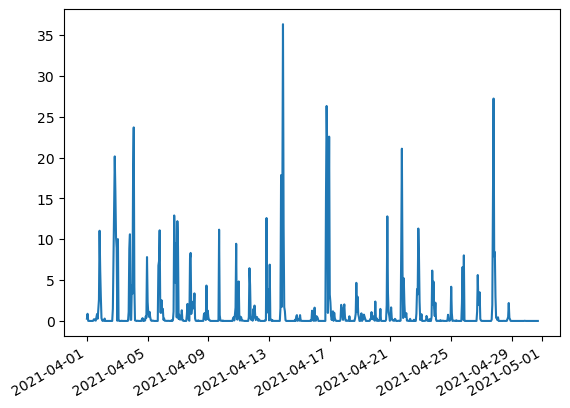

In [54]:
precip_frm = np.nanmax(precip,axis=(1,2))
precip_frm = np.roll(precip_frm,-1,axis=0)-precip_frm
print(precip_frm.max())
times = df_wrf.XTIME

# enddate specifies the date range to be plotted (hours since starting point).
enddate = 714
fig, ax = plt.subplots() 
ax.plot(times[:enddate],precip_frm[:enddate])
fig.autofmt_xdate()

# Average Monthly

1.4120483
0.19601166


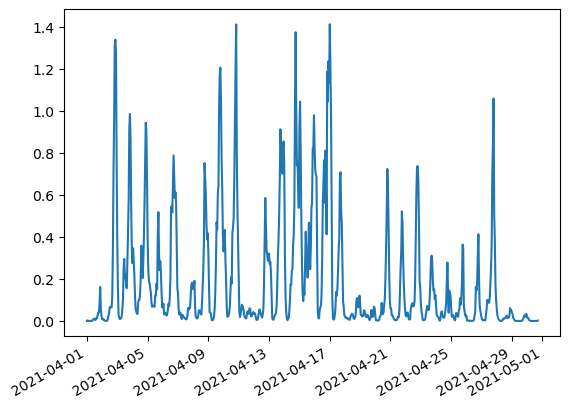

In [55]:
precip_frm = np.nanmean(precip,axis=(1,2))
precip_frm = np.roll(precip_frm,-1,axis=0)-precip_frm
print(precip_frm.max())
print(precip_frm[:714].mean())
times = df_wrf.XTIME

# enddate specifies the date range to be plotted (hours since starting point).
enddate = 714
fig, ax = plt.subplots() 
ax.plot(times[:enddate],precip_frm[:enddate])
fig.autofmt_xdate()

# Maximum Daily Rainfall

36.342834


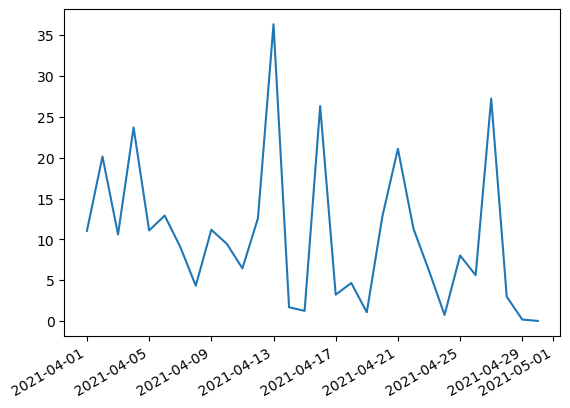

In [56]:
precip_frm = np.nanmax(precip,axis=(1,2))
precip_frm = np.roll(precip_frm,-1,axis=0)-precip_frm
precip_split = np.array_split(precip_frm, 30)

daily_max_list = []
for day in precip_split:
    daily_max = day.max()
    daily_max_list.append(daily_max)

times = df_wrf.XTIME
# enddate specifies the date range to be plotted (hours since starting point).
enddate = 714
fig, ax = plt.subplots() 
ax.plot(times[0:-1:24],daily_max_list)
fig.autofmt_xdate()
print(max(daily_max_list))


# Try putting wrf files in qgis and do zonal statistics already